In [7]:
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

In [8]:
# Keep only certain columns
mpg = pd.read_csv('datasets/mpg/mpg.csv', usecols = ['mpg', 'weight', 'horsepower', 'origin', 'cylinders'])
print(mpg.head())

    mpg  cylinders  horsepower  weight origin
0  18.0          8         130    3504    USA
1  15.0          8         165    3693    USA
2  18.0          8         150    3436    USA
3  16.0          8         150    3433    USA
4  17.0          8         140    3449    USA


In [9]:
# Descriptive statistics
print(mpg.describe())

              mpg   cylinders  horsepower       weight
count  392.000000  392.000000  392.000000   392.000000
mean    23.445918    5.471939  104.469388  2977.584184
std      7.805007    1.705783   38.491160   849.402560
min      9.000000    3.000000   46.000000  1613.000000
25%     17.000000    4.000000   75.000000  2225.250000
50%     22.750000    4.000000   93.500000  2803.500000
75%     29.000000    8.000000  126.000000  3614.750000
max     46.600000    8.000000  230.000000  5140.000000


In [10]:
# Descriptive statistics by group
print(mpg.groupby('origin').describe(include='all')[['mpg']])

          mpg                                                      
        count       mean       std   min    25%   50%     75%   max
origin                                                             
Asia     79.0  30.450633  6.090048  18.0  25.70  31.6  34.050  46.6
Europe   68.0  27.602941  6.580182  16.2  23.75  26.0  30.125  44.3
USA     245.0  20.033469  6.440384   9.0  15.00  18.5  24.000  39.0


In [11]:
# Descriptive statistics by group
print(mpg.groupby('origin').describe()['mpg'])

        count       mean       std   min    25%   50%     75%   max
origin                                                             
Asia     79.0  30.450633  6.090048  18.0  25.70  31.6  34.050  46.6
Europe   68.0  27.602941  6.580182  16.2  23.75  26.0  30.125  44.3
USA     245.0  20.033469  6.440384   9.0  15.00  18.5  24.000  39.0


In [12]:
# One-way frequency table
print(pd.crosstab(index=mpg['origin'], columns = 'count'))

col_0   count
origin       
Asia       79
Europe     68
USA       245


In [13]:
pd.crosstab(index=mpg['origin'], columns='count')

col_0,count
origin,
Asia,79
Europe,68
USA,245


In [14]:
# Two-way frequency table
print(pd.crosstab(index=mpg['origin'], columns=mpg['cylinders'])) 

cylinders  3   4  5   6    8
origin                      
Asia       4  69  0   6    0
Europe     0  61  3   4    0
USA        0  69  0  73  103


In [15]:
# Histogram of mpg
sns.displot(data=mpg, x='mpg')

AttributeError: module 'seaborn' has no attribute 'displot'

In [16]:
sns.displot(data=mpg, x="mpg", col="origin")

AttributeError: module 'seaborn' has no attribute 'displot'

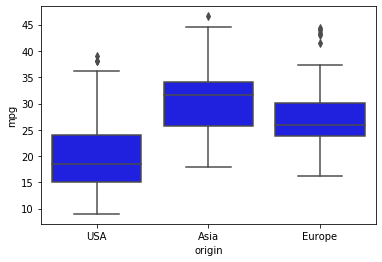

In [19]:
# Box plot of mpg by origin
sns.boxplot(x='origin', y='mpg', data=mpg, color='blue')

In [22]:
# Is there a difference in mileage between
# USA and European cars?

# Split Dataframe 
usa_cars = mpg[mpg['origin']=='USA']
europe_cars = mpg[mpg['origin']=='Europe']

stats.ttest_ind(usa_cars['mpg'], europe_cars['mpg'])

Ttest_indResult(statistic=-8.534455914399228, pvalue=6.306531719750568e-16)

In [23]:
type(usa_cars['mpg'])

pandas.core.series.Series

Text(0.5, 1.0, 'Relationship between weight and mileage')

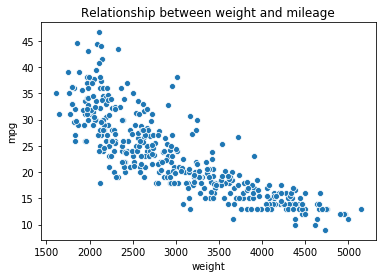

In [8]:
# Scatter plot of weight and mpg, add a label
sns.scatterplot(mpg['weight'],mpg['mpg'])
plt.title("Relationship between weight and mileage")

In [22]:
# Linear regression of weight on mpg
stats.linregress(x=mpg['weight'], y=mpg['mpg'])

LinregressResult(slope=-0.007647342535779578, intercept=46.21652454901758, rvalue=-0.8322442148315754, pvalue=6.015296051435726e-102, stderr=0.0002579632782734318)

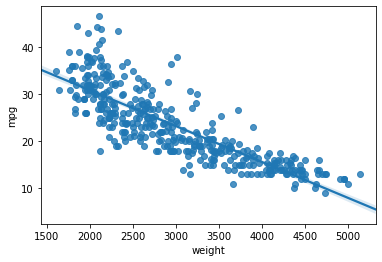

In [24]:
sns.regplot(x="weight", y="mpg", data=mpg)

In [26]:
# Correlation matrix -- only
# include relevant variables
print(mpg[['mpg','horsepower','weight']].corr())

                 mpg  horsepower    weight
mpg         1.000000   -0.778427 -0.832244
horsepower -0.778427    1.000000  0.864538
weight     -0.832244    0.864538  1.000000


In [32]:
# Linear regression of weight on mpg
stats.linregress(mpg['weight'],mpg['mpg'])

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 2 and the array at index 1 has size 392